In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn
!pip install sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
df = pd.read_csv("C:/Users/Nisha/Desktop/Brain tumour detection project/archive (5)/Brain Tumor.csv")
df.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               3762 non-null   object 
 1   Class               3762 non-null   int64  
 2   Mean                3762 non-null   float64
 3   Variance            3762 non-null   float64
 4   Standard Deviation  3762 non-null   float64
 5   Entropy             3762 non-null   float64
 6   Skewness            3762 non-null   float64
 7   Kurtosis            3762 non-null   float64
 8   Contrast            3762 non-null   float64
 9   Energy              3762 non-null   float64
 10  ASM                 3762 non-null   float64
 11  Homogeneity         3762 non-null   float64
 12  Dissimilarity       3762 non-null   float64
 13  Correlation         3762 non-null   float64
 14  Coarseness          3762 non-null   float64
dtypes: float64(13), int64(1), object(1)
memory usage: 441.0

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X = df.drop(['Image'], axis=1)
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
reg = LogisticRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

C:\Users\Nisha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [13]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [14]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [15]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [16]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [17]:
model_pipeline = []
model_pipeline.append(LogisticRegression(solver = 'liblinear'))
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(GaussianNB())
model_pipeline.append(DecisionTreeClassifier())


In [19]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model_list = ['Logistic Regression','SVM','KNN','Decision Tree','Random Forest','Naive Bayes']
acc_list = []
auc_list = []
cm_list = []

for model in model_pipeline:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc_list.append(metrics.accuracy_score(y_test,y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve(y_test,y_pred)
    auc_list.append(round(metrics.auc(fpr,tpr),2))
    cm_list.append(confusion_matrix(y_test,y_pred))


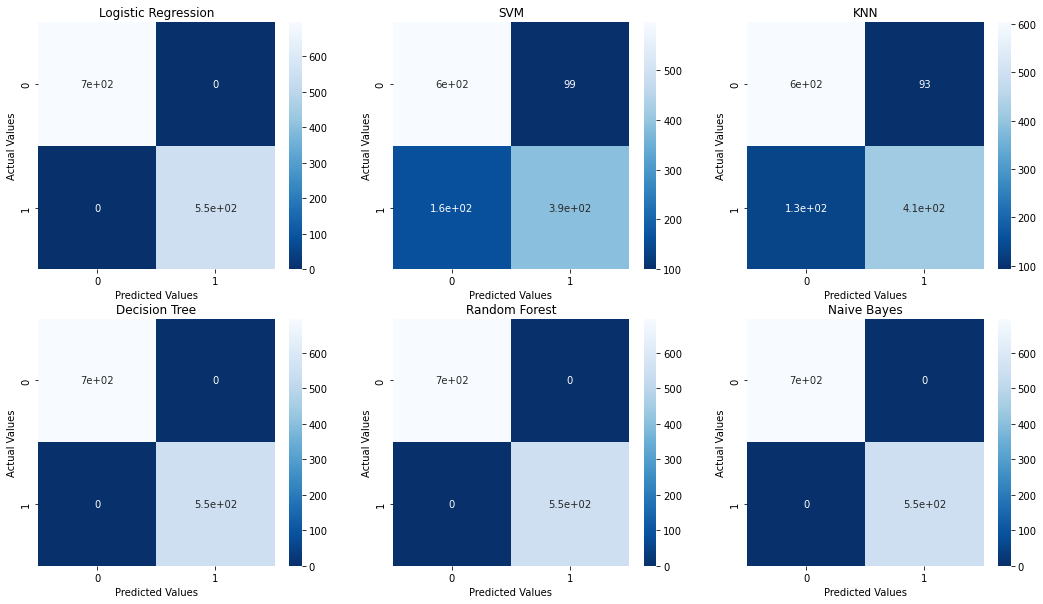

In [32]:
#plot confusion matrix
fig = plt.figure(figsize=(18,10))
for i in range (len(cm_list)):
    cm=cm_list[i]
    model=model_list[i]
    sub=fig.add_subplot(2,3,i+1).set_title(model)
    cm_plot = seaborn.heatmap(cm,annot=True,cmap="Blues_r")
    cm_plot.set_xlabel("Predicted Values")
    cm_plot.set_ylabel("Actual Values")

In [33]:
#accuracy and auc
result_df = pd.DataFrame({'Model':model_list,'Accuracy':acc_list,'AUC':auc_list})
result_df

,Model,Accuracy,AUC
0,Logistic Regression,1.000000,1.00
1,SVM,0.791465,0.78
2,KNN,0.818841,0.81
3,Decision Tree,1.000000,1.00
4,Random Forest,1.000000,1.00
5,Naive Bayes,1.000000,1.00
